<a href="https://colab.research.google.com/github/shrutiiiyadav/-_-1-IRIS-FLOWER-CLASSIFICATION/blob/main/Copy_of_TSF_EXP_8(ROLL_NO_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME:** Shruti Yadav

**ROLL NO:** 20

**Experiment No. 8 :** Implementation of Modelling time series Moving average , Exponential
smoothing , ARIMA

**Maximum Marks:** 10

**Experimentation:**


1. Understand ARIMA Parameters
2. Implement ARIMA model and evaluate ARIMA Model Performance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


<Axes: >

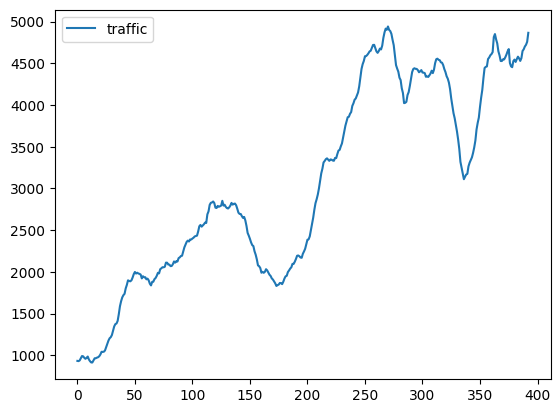

In [ ]:
import pandas as pd
df = pd.read_csv('/content/website_data.csv')
df.info()

df.plot()

<Axes: >

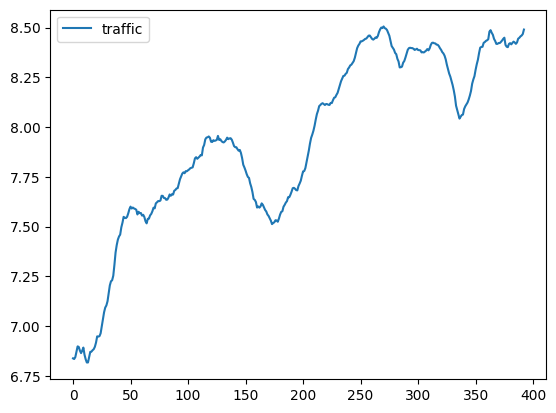

In [ ]:
import numpy as np
df = np.log(df)
df.plot()

In [ ]:
import pandas as pd
import numpy as np

# Take the log of the data
df = np.log(df)

# Split the data into training and test sets
msk = (df.index < len(df) - 30)
df_train = df[msk].copy()
df_test = df[~msk].copy()

**check for stationary of time series**

<ipython-input-8-a8269e06b4f1>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


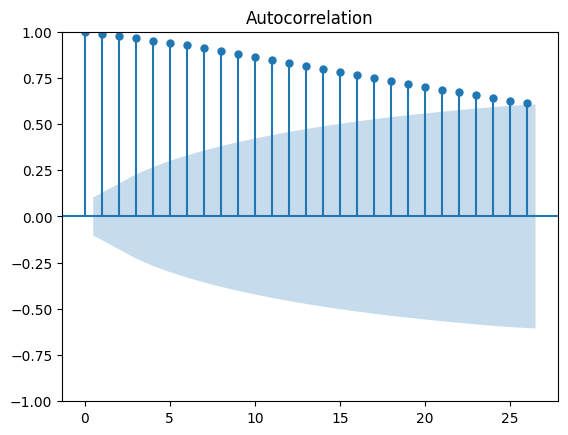

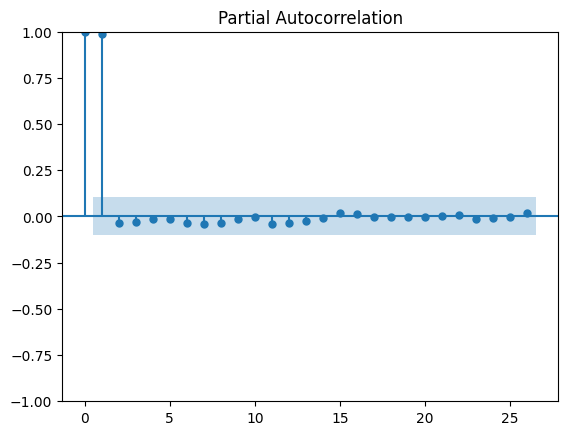

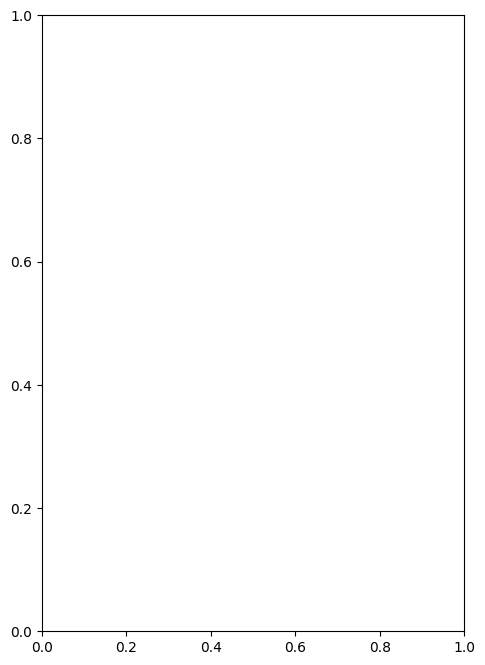

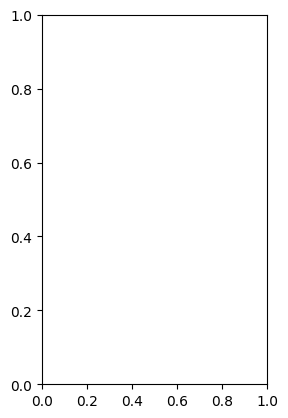

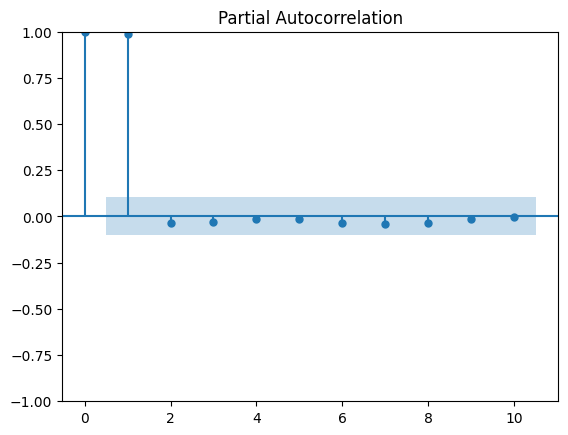

In [ ]:
#method 1
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

#method 2
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(121)
plot_acf(df_train, lags=10)
plt.subplot(122)
plot_pacf(df_train, lags=10)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')


p-value: 0.1687441536080478


**Transform to stationary : differencing**

In [ ]:
df_train_diff = df_train.diff().dropna()

In [ ]:
from pandas import Series

df_train_diff = df_train.diff().dropna()

<Axes: >

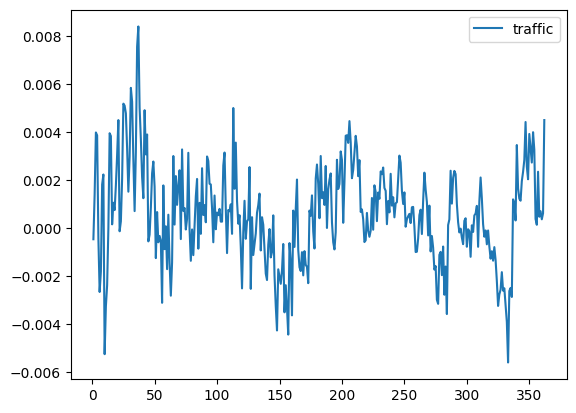

In [ ]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

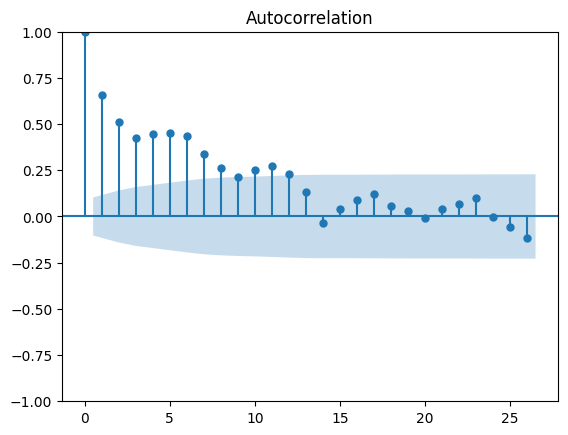

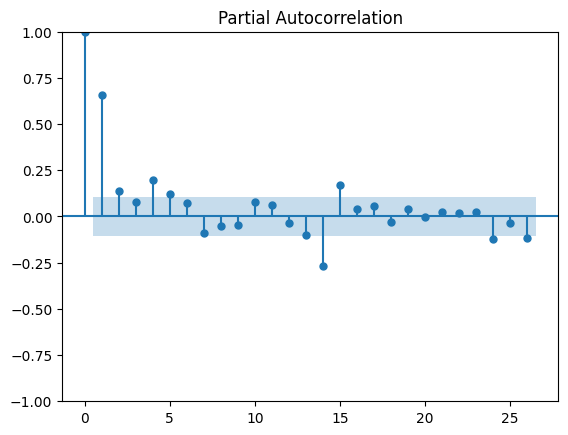

In [ ]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [ ]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.02041172627425859


**Fit the arima model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  363
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1832.390
Date:                Wed, 24 Apr 2024   AIC                          -3658.780
Time:                        04:20:10   BIC                          -3647.105
Sample:                             0   HQIC                         -3654.139
                                - 363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5921      0.048     12.302      0.000       0.498       0.686
ar.L2          0.1456      0.057      2.555      0.011       0.034       0.257
sigma2      2.343e-06   1.33e-07     17.648      0.0

**Make time series predictions**

In [ ]:
forecast_test = model.forecast(len(df_test))

<Axes: >

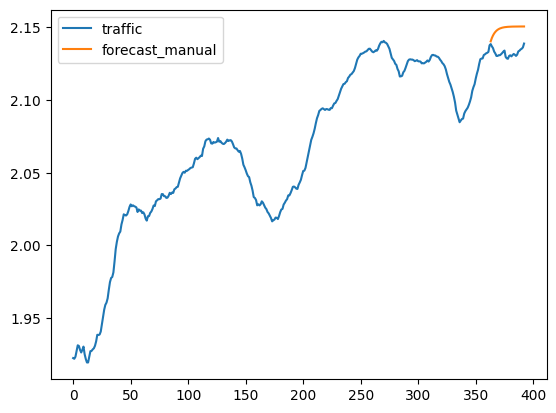

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train the ARIMA model
model = ARIMA(df_train, order=(2,1,0))
model = model.fit()

# Make a forecast
forecast_test = model.forecast(len(df_test))

# Add the forecast to the DataFrame
df['forecast_manual'] = [None] * len(df_train) + list(forecast_test)

# Plot the data
df.plot()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.1 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

In [ ]:
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  363
Model:               SARIMAX(5, 1, 0)   Log Likelihood                1845.855
Date:                Wed, 24 Apr 2024   AIC                          -3677.709
Time:                        04:32:33   BIC                          -3650.468
Sample:                             0   HQIC                         -3666.880
                                - 363                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001   8.19e-05      1.404      0.160   -4.55e-05       0.000
ar.L1          0.5216      0.050     10.417      0.000       0.423       0.620
ar.L2          0.0897      0.065      1.382      0.167      -0.037       0.217
ar.L3         -0.0457      0.063     -0.720      0.472      -0.170       0.079
ar.L4          0.1260      0.050      2.495      0.013       0.027       0.225
ar.L5          0.1239      0.047      2.656      0.008       0.032       0.215
sigma2       2.16e-06   1.39e-07     15.551      0.000    1.89e-06    2.43e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.78
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

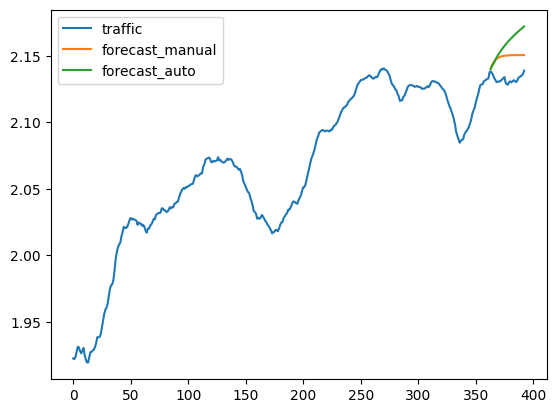

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None] * len(df_train) + list(forecast_test_auto)

df.plot()

In [ ]:
from sklearn import metrics
mean_absolute_error, mean_absolute_percentage_error = metrics.mean_absolute_error, metrics.mean_absolute_percentage_error
mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(metrics.mean_squared_error(df_test, forecast_test))
print(f'mae manual: {mae}')
print(f'mape manual: {mape}')
print(f'rmse manual: ({rmse})')

mae manual: 0.016544126111880518
mape manual: 0.0077602578675061255
rmse manual: (0.017147376462097626)
